## Sentiment Analysis (Text Mining)

Urban Dictionary is a crowdsourced online dictionary of slang words and phrases.
The study will be about, likes by words, word with more likes and dislikes, author with more contributions in the web, finally we'll make a sentiment analysis using AFINN 111 file.
It'll be interesting to analyze the feeling of differents definitions, urban dictionary uses colloquial language, we'll probaly get interesting results.

### Module imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [2]:
urban_data = pd.read_csv("../input/urban_dictionary.csv", sep=',')
urban_data.head()

,definition,word,author,tags,up,down,date
0,When a city or town specifically zones an area...,Jizzneyland,whocaresaboutNY,"[u'#jisneyland', u'#gizzneyland', u'#adult zon...",6267,6382,"April 05, 2013"
1,A toilet bowl.,trump basket,jknightx,[],729,634,"March 23, 2017"
2,Excellent health care reserved exclusively for...,wealth care,Davis Finch,"[u'#insurance', u'#rich', u'#america', u'#capi...",1072,625,"May 16, 2008"
3,A dick thing you say to a tall person to piss ...,hows the weather up there,Jackalfu,[],1428,580,"March 20, 2017"
4,"The insane, narcissistic, outrageous asshat wh...",ratfucker,FedupAngryLiberal,"[u'#trump', u'#asshat', u'#scum', u'#asshole',...",1580,2351,"March 18, 2017"


### Summary of the DataSet

In [3]:
urban_data.info()
#urban_data.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 7 columns):
definition    4272 non-null object
word          4272 non-null object
author        4272 non-null object
tags          4272 non-null object
up            4272 non-null int64
down          4272 non-null int64
date          4272 non-null object
dtypes: int64(2), object(5)
memory usage: 233.7+ KB


In this version we'll not use 'tags' and 'date' columns.

In [4]:
urban_data.drop(['tags','date'], axis=1, inplace=True)

In [5]:
# Get the how many words each 'autor' has?
def get_author_rep(author):
    counts = {}
    for x in author:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [6]:
# Get the name of the 'author' with more contributions.
def max_author(author):
    maxi = -1
    for k in author:
        if(author[k] > maxi):
            maxi = author[k]
    return k, maxi

### Author with more contributions

In [7]:
count_author = get_author_rep(urban_data['author'])
author, maxi = max_author(count_author)
print("'"+ author +"' upload the Urban Dictionary "+ str(maxi) + " words.")

'gateway_gamer' upload the Urban Dictionary 23 words.


### Positive votes Average

In [8]:
positive_vote_average = urban_data['up'].mean()
print('Positive vote average: ', positive_vote_average)

Positive vote average:  4414.286516853933


### Negative votes Average

In [9]:
negative_vote_average = urban_data['down'].mean()
print('Negative vote average: ', negative_vote_average)

Negative vote average:  3073.1062734082398


### Word with more Likes (Positive votes)

In [10]:
positive_word = urban_data['up'].max()
positive = urban_data[urban_data.up==positive_word]
print("Word: "+ str(positive.word.values))
print("Definition: "+ str(positive.definition.values))
print("Up votes: "+ str(positive.up.values))

Word: ['love']
Definition: ["nature's way of tricking people into reproducing"]
Up votes: [100236]


### Word with more Dislikes (Negative votes)

In [11]:
negative_word = urban_data['down'].max()
negative = urban_data[urban_data.down==negative_word]
print("Word: "+ str(negative.word.values))
print("Definition: "+ str(negative.definition.values))
print("Down votes: "+ str(negative.down.values))

Word: ['Donald Trump']
Definition: ["Living proof that money can't buy good hair."]
Down votes: [32371]


# AFINN-111 Sentiment Analysis

Text sentiment analysis (or usually just sentiment analysis) is a text mining technique to analyze the sentiment of the writer or to the topic written about. One approach is to use a word list where each word has been scored for positivity/negativity or sentiment strength. There are different lists, we use AFFIN and the version 111.

> AFINN is a list of English words rated for valence with an integer
between minus five (negative) and plus five (positive). The words have
been manually labeled by Finn Årup Nielsen in 2009-2011. The file
is tab-separated. There are two versions:

> AFINN-111: Newest version with 2477 words and phrases.

In [12]:
#Get requests response "Failed to establish a new connection: [Errno -2]"
#url_web = "https://raw.githubusercontent.com/hyharryhuang/AFINN-json/master/AFINN.json"
#We are going to hardcode the Afinn-111 json

In [13]:
#afinn_data = rq.get(url_web)
#afinn_data.status_code

In [14]:
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2","advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1","affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2","aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2","agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

In [15]:
score_word_dict = dict(afinn_data)

In [16]:
# Set the score of each word definition.
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [17]:
scores=[]
for d in urban_data['definition']:
    score = definition_score(d, score_word_dict)
    #print(score)
    scores.append(score)
    

In [18]:
# We create a new column 'definition_feeling_score' with score of each definition. 
urban_data['definition_feeling_score'] = scores

In [19]:
urban_data_sort_by_feeling = urban_data.sort_values(by=['definition_feeling_score'])

### Words with the worst sentiment

In [20]:
urban_data_sort_by_feeling[['definition','word','definition_feeling_score']][:15]

,definition,word,definition_feeling_score
899,A boss ass bitch is a woman who goes above and...,bo$$ ass bitch,-36
1919,A type of crying that can feel really good and...,ugly cry,-19
3975,New England slang that adds emphasis. Synonymo...,Wicked,-19
1837,When you hate the cold so much you take certai...,Cold Anxiety,-17
214,An excuse used by shitty people to deny owners...,where is this coming from,-14
2567,A crime commited while under the influence of ...,High Crime,-13
945,How a dumb motherfucker becomes a smart mother...,High-Q,-12
289,Taking a dick pick angling the camera up towar...,dickheading,-12
326,When you've eaten something that has totally f...,ass liquid,-12
1606,An anxiety disorder resulting from a test that...,post traumatic test syndrome,-11


(-0.5, 399.5, 199.5, -0.5)

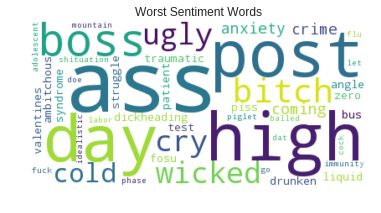

In [21]:
worst_sentiment__words = urban_data_sort_by_feeling.word[:25].to_string().replace("$", "s")
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(worst_sentiment__words.lower())
plt.title("Worst Sentiment Words")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Definition "bo$$ ass bitch"

In [22]:
urban_data_sort_by_feeling.definition.ix[899]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


"A boss ass bitch is a woman who goes above and beyond simply being a bad bitch. While she is not the baddest she is above several bad bitches an you can't step to her. She keep her money right, game tight, and she'll beat a bitch ass all night. Most ratchets like to call themselves Boss Ass Bitches when it is apparent is is not true."

#### Definition "ugly cry"

In [23]:
urban_data_sort_by_feeling.definition.ix[1919]

"A type of crying that can feel really good and really bad at the same time.  The ugly cry can occur after a severe tragedy in one's life, or simply for no reason at all. You know you're doing the ugly cry when you lose COMPLETE CONTROL of all of the muscles in your face, start heaving and making awkward sounds (even though you are trying really hard to be silent), and start leaking fluids from every opening on your face from your hairline to your chin (yes, this includes the mouth). Without a doubt, by the time you are through with your ugly cry episode (if it was genuine) it will look as though you are a homeless person with pink eye who got punched a few times in the face and was hit my a monsoon; this is completely normal (and generally the time to call up a good friend)."

#### Definition "Wicked"

In [24]:
urban_data_sort_by_feeling.definition.ix[3975]

'New England slang that adds emphasis. Synonymous with really, very and hella.\r To describe how great something is: "This car is wicked cool!"\rTo show aggravation: "This fucking guy is a wicked asshole!"\rTo show frustration: "That guy is wicked slow!"\rTo show amazement: "Wow, that game is wicked awesome!"\rTo describe a person: "She\'s a wicked bitch!"\rTo describe the weather: "Man, it\'s wicked hot out here!"\rTo emphasize feelings: "That story made me wicked sad!"\rTo exaggerate your point: "That took a wicked long time!"'

####  Definition	"Cold Anxiety"

In [25]:
urban_data_sort_by_feeling.definition.ix[1837]

"When you hate the cold so much you take certain steps in your life to avoid cold situations. You miss out on events and other happenings because it is either 1) taking place on a cold night outside or 2) taking place on a night with a touch of cold and you are nervous that your sweater won't be warm enough. You do not fear the alarm clock, you fear the cold burst of air that will flow over your body once you pull the comfortor off your body. You don't hate showering, but you hate the feeling of stepping out of the shower and towelling off so you either a) blow-dry your body before your hair, or b) install a sauna next to your shower.\rYou also find yourself in a sweatshirt while others are wearing bathingsuits and you stare in disbelief at how cold they must be!"

#### Definition "where is this coming from"

In [26]:
urban_data_sort_by_feeling.definition.ix[214]

'An excuse used by shitty people to deny ownership or knowledge of their bad qualities. Can also be used to devalue and avoid change or responsibility over what the other person said to them. In either case, the speaker feigns surprise at these "new" and "unexpected" things they are being told.Translates directly into "you\'ve taken all my shit before, why the sudden backbone?" and/or "I\'ve known this for awhile, but why bring it up now?"'

### Words with the best sentiment

In [27]:
urban_data_sort_by_feeling[['definition','word','definition_feeling_score']][-15:]

,definition,word,definition_feeling_score
978,"ManDate: Two, and only two straight single men...",ManDate,10
2890,e⋅lec⋅tion e⋅rec⋅tion ĭ-lěk'shən ĭ-rěk'shən -n...,Election erection,10
1380,"Usually a middle ranking manager,often found i...",wingtip wearer,10
1719,Making a nice (fake) gesture for someone when ...,empty gesture,10
640,To go down on a woman is to start her off with...,go down on,10
552,When Batman fans try to rationalize that Batma...,I'm Batman syndrome,10
1998,"The pleasant ""high"" feeling one acquires aroun...",friend high,10
2893,"scorpios are sensual, sexy and mesmerizing. th...",scorpio,11
1664,Glamorous camping. Satisfying your craving for...,glamping,11
1815,A form of graffiti. It involves writing in the...,Groutfiti,11


(-0.5, 399.5, 199.5, -0.5)

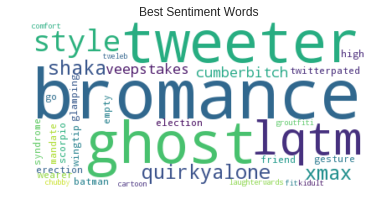

In [28]:
best_sentiment__words = urban_data_sort_by_feeling.word[-25:].to_string().replace("$", "s")
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(best_sentiment__words.lower())
plt.title("Best Sentiment Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Definition "Tweleb"

In [29]:
urban_data_sort_by_feeling.definition.ix[950]

'A (partially) anonymous, popular Twitter user who has nothing else going for them. Twelebs live for RTs and ":\'\'\'\'D"s from their followers as they tweet ignorant, sometimes funny and mostly offensive content all in the name of retaining their Tweleb status. Every Tweleb\'s avatar change is welcomed with dozens of "Avi appreciations" from their followers, to which they\'re usual reply is something like: "Wow. Humbled." They are easily recognisable by their amount of followers on Twitter (usually 5000 or more). Their Twitter names are usually their Instagram name or a name promoting the latest cool kid gathering e.g: #coolkidgathering15Oct!!!Though many of them aren\'t bad people, they live pretty mediocre lives and for most being a Tweleb is probably as good as it\'ll ever get for them.Examples of Twelebs:A grown-ass man who still lives with his Mom but still hasn\'t gotten that Diploma that\'s taking him at least 5 years (and counting) to complete because he is too busy chasing "e

#### Definition "comfort cartoon"

In [30]:
urban_data_sort_by_feeling.definition.ix[167]

'Synonymous to comfort food, comfort cartoon provides feelings of nostalgia and sentimentality towards the viewers. The type of animation tends to be stylized and visually appealing: over or under saturation of colours, "incorrect" motion etc.\rThe storylines tend to be rich with lessons and underlying meanings (nutrients) or sometimes it\'s just for pure fun and joy (carbs).Popular examples would be: Classic Looney Tunes, B&W Mickey Mouse, retro Disney (70\'s or 80\'s classics).'

#### Definition "Laughterwards"

In [31]:
urban_data_sort_by_feeling.definition.ix[100]

'A TV show, Film or situation that was not really funny or marginally funny that for whatever reason is much funnier aftwrwards.'

#### Definition "kidult"

In [32]:
urban_data_sort_by_feeling.definition.ix[507]

'A so-called grown-up who doesn\'t want to grow up (or at least act like an adult) and would instead prefer so-called "children\'s" stuff for entertainment, like cartoons, toys, comic books, Disney movies, etc. He or she also enjoys colorful "kiddie" snacks like breakfast cereal and Spaghetti-O\'s and dresses like a teenager or perhaps younger. May or may not be great parents as well as being able to take on adult responsibilities. Not necessarily too immature at least in the public. Not to to be confused with geeks or nerds either, of course! \r Also known as "Peter Pan", "young at heart", and "kid at heart".'

#### Definition "chubby fit"

In [33]:
urban_data_sort_by_feeling.definition.ix[870]

'When you can run faster than most people and you give the best hugs because you are warm and great to cuddle up into. To be chubby fit you must be active but also have a six pack of pudding cups!'

## Difference between likes and dislikes

In [34]:
#Columna con la diferencia entre likes y dislikes
urban_data['diff_likes'] = urban_data['up'] - urban_data['down']
#urban_data.head()

### Words with likes difference greather
> "Love" the word with more "up" votes and less "down" from the whole dictionary.

> "Nerd" -> "One whose IQ exceeds his weight."
Good joke!!! XDDDD!!

In [35]:
urban_data.sort_values(['diff_likes'], ascending=False)[:10]

,definition,word,author,up,down,definition_feeling_score,diff_likes
2062,nature's way of tricking people into reproducing,love,Anonymous,100236,24548,0,75688
2149,The TSA airport screening procedure.,Gate Rape,Kon Tiki,79630,9297,0,70333
2123,The TSA airport screening procedure.,Gate Rape,Kon Tiki,79630,9297,0,70333
1921,"1. The universally recognized ""F word""\r2. N. ...",fuck,Cheese-man,68493,20988,-3,47505
2128,One whose IQ exceeds his weight.,Nerd,Anonymous,43625,6303,0,37322
99,"The sometimes frothy, usually slimy, amalgam o...",santorum,Bohica Zamboni,39281,14421,2,24860
1747,"The sometimes frothy, usually slimy, amalgam o...",santorum,Bohica Zamboni,39281,14421,2,24860
2305,"A variant of ""that's what she said."" Instead o...",That's What BP Said,Hamfry,34277,10242,-5,24035
2129,The people you pick on in high school and wind...,geek,longislandguy,26284,4745,0,21539
2521,One who prevents another from scoring sexually.,cock block,Miss Priss,24979,3535,-1,21444


(-0.5, 399.5, 199.5, -0.5)

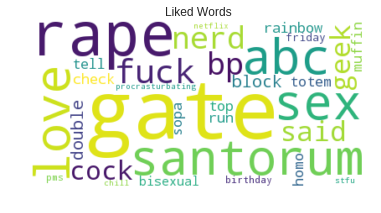

In [36]:
liked_words = urban_data.sort_values(['diff_likes'], ascending=False)[:25]
liked_words = liked_words.word.to_string()
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(liked_words.lower())
plt.title("Liked Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Words with likes difference lower
> "OMJ" -> "As known to the Jonas Brothers fans, it would be stood for 'Oh My Jonas!'\r but if you put OMJJ or OMNJ, it would be like Oh My Joe Jonas or Oh My Nick Jonas." 

It's not a good idea to mention Jonas Brothers, your definition will get lots of dislikes.

In [37]:
urban_data.sort_values(['diff_likes'], ascending=True).head()

,definition,word,author,up,down,definition_feeling_score,diff_likes
2238,"As known to the Jonas Brothers fans, it would ...",OMJ,k3ss!ah,1339,16214,2,-14875
2461,A movie rentals-by-mail service for squirrels,Nutflix,orijimi,2174,16796,0,-14622
1639,You Only Live Once!,yolo,Colin,11723,25687,0,-13964
2730,A phrase that comes from the mixture of the em...,Are you shitreous?,perthguy,1265,11654,-2,-10389
2651,"4OJ is a slang abbreviation for the ""4th of Ju...",4OJ,emmettdancer,975,11159,0,-10184


### Pie Charts

In [38]:
# Pie options
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#### Pie about numbers of words with positive value (True) and negative value (False)

In [39]:
#Boolean column if (up>=down): True
urban_data['positive_likes'] = urban_data['up'] > urban_data['down']
urban_data[['word','up','down','positive_likes']].head()

,word,up,down,positive_likes
0,Jizzneyland,6267,6382,False
1,trump basket,729,634,True
2,wealth care,1072,625,True
3,hows the weather up there,1428,580,True
4,ratfucker,1580,2351,False


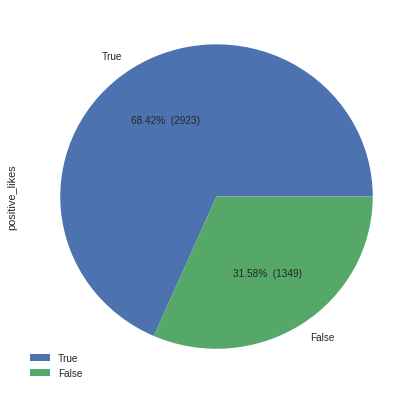

In [40]:
urban_data_positive_likes = urban_data['positive_likes'].value_counts()
urban_data_positive_likes.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(urban_data_positive_likes));

#### Pie about numbers of words with positive feeling in the definition.

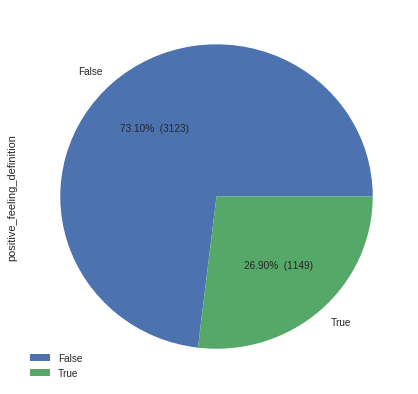

In [41]:
urban_data['positive_feeling_definition'] = urban_data['definition_feeling_score'] > 0
urban_data_positive_feeling_definition = urban_data['positive_feeling_definition'].value_counts()
urban_data_positive_feeling_definition.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(urban_data_positive_feeling_definition));

There are a lot of words with value definitions 0, first of all, in this case it's important split the feeling score in another category.
We'll create 3 categories ((min score, -1], (-1,1), [1, max score)) and we'll see the results.

In [42]:
max_definition_feeling = urban_data['definition_feeling_score'].max()
min_definition_feeling = urban_data['definition_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

urban_data['definition_feeling_category'] = pd.cut(urban_data['definition_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

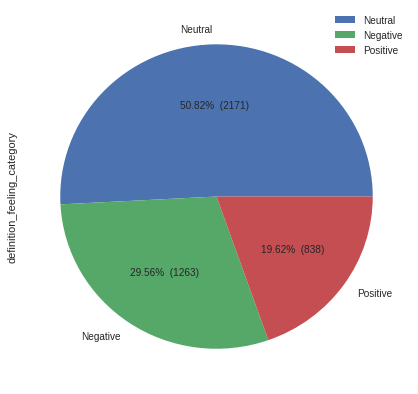

In [43]:
urban_data_definition_feeling_category = urban_data['definition_feeling_category'].value_counts()
urban_data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(urban_data_definition_feeling_category));

## Text Mining Conclusions
1. There are multiple words that don't have score in Afinn-111 that the result of the large amount of neutral words.
2. 'Urban Dictionary' uses colloquial language, maybe that the reason of the negative value above positive words.
3. 'Urban Dictionary' uses sarcasm and text mining can't score properly this type of expresions.